In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
df = pd.read_csv("customer satisfaction.csv", delimiter = ",")
print(df.head())

        id  gender  age   lifecycle  delivery_options  online_ordering_flow  \
0  1334268  Female   55   Returning                 3                     3   
1    25807  Female   39  First-time                 1                     1   
2  8091466  Female   56   Returning                 2                     2   
3  6008938  Female   64   Returning                 4                     3   
4  3030096    Male   59   Returning                 5                     3   

   chocolate_quality  chocolate_variety  chocolate_uniqueness  innovation  \
0                  4                  3                     3           1   
1                  4                  1                     3           2   
2                  2                  3                     3           2   
3                  5                  5                     3           4   
4                  1                  5                     4           1   

   inspiration  payment_options  price_fairness  price_variety

In [3]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    5000 non-null   int64 
 1   gender                5000 non-null   object
 2   age                   5000 non-null   int64 
 3   lifecycle             5000 non-null   object
 4   delivery_options      5000 non-null   int64 
 5   online_ordering_flow  5000 non-null   int64 
 6   chocolate_quality     5000 non-null   int64 
 7   chocolate_variety     5000 non-null   int64 
 8   chocolate_uniqueness  5000 non-null   int64 
 9   innovation            5000 non-null   int64 
 10  inspiration           5000 non-null   int64 
 11  payment_options       5000 non-null   int64 
 12  price_fairness        5000 non-null   int64 
 13  price_variety         5000 non-null   int64 
 14  price_comparison      5000 non-null   int64 
 15  packaging             5000 non-null   

,id,gender,age,lifecycle,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,satisfaction
0,1334268,Female,55,Returning,3,3,4,3,3,1,4,1,2,3,1,1,Neutral or Dissatisfied
1,25807,Female,39,First-time,1,1,4,1,3,2,3,1,5,5,2,1,Neutral or Dissatisfied
2,8091466,Female,56,Returning,2,2,2,3,3,2,3,2,2,5,2,2,Neutral or Dissatisfied
3,6008938,Female,64,Returning,4,3,5,5,3,4,4,3,3,4,4,3,Neutral or Dissatisfied
4,3030096,Male,59,Returning,5,3,1,5,4,1,1,3,2,5,1,3,Neutral or Dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9639973,Male,41,Returning,1,1,5,5,1,5,5,4,3,3,5,1,Satisfied
4996,2586817,Female,52,Returning,2,2,3,5,2,4,4,4,5,5,4,2,Satisfied
4997,7783931,Female,50,First-time,0,1,3,1,4,2,3,1,3,3,3,1,Neutral or Dissatisfied
4998,7871834,Male,24,First-time,3,3,2,3,3,2,2,5,2,2,3,3,Neutral or Dissatisfied


In [4]:
df = pd.get_dummies(df, columns = ["gender", "lifecycle", "satisfaction"], drop_first=True)
df

,id,age,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,gender_Male,lifecycle_Returning,satisfaction_Satisfied
0,1334268,55,3,3,4,3,3,1,4,1,2,3,1,1,0,1,0
1,25807,39,1,1,4,1,3,2,3,1,5,5,2,1,0,0,0
2,8091466,56,2,2,2,3,3,2,3,2,2,5,2,2,0,1,0
3,6008938,64,4,3,5,5,3,4,4,3,3,4,4,3,0,1,0
4,3030096,59,5,3,1,5,4,1,1,3,2,5,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,9639973,41,1,1,5,5,1,5,5,4,3,3,5,1,1,1,1
4996,2586817,52,2,2,3,5,2,4,4,4,5,5,4,2,0,1,1
4997,7783931,50,0,1,3,1,4,2,3,1,3,3,3,1,0,0,0
4998,7871834,24,3,3,2,3,3,2,2,5,2,2,3,3,1,0,0


In [5]:
df.describe()


,id,age,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,gender_Male,lifecycle_Returning,satisfaction_Satisfied
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,5.068127e+06,39.415400,3.053400,2.763600,3.313600,3.245800,2.979800,3.386600,3.443400,3.357600,3.31060,3.211800,3.659400,2.739000,0.50040,0.814000,0.435400
std,2.912816e+06,15.164657,1.514136,1.397321,1.266482,1.360497,1.286594,1.279636,1.308869,1.316081,1.30494,1.323666,1.173059,1.318342,0.50005,0.389146,0.495859
min,1.586000e+03,7.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
25%,2.566572e+06,27.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,3.000000,2.000000,0.00000,1.000000,0.000000
50%,5.070709e+06,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.00000,3.000000,4.000000,3.000000,1.00000,1.000000,0.000000
75%,7.606288e+06,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,5.000000,4.000000,1.00000,1.000000,1.000000
max,9.999241e+06,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,1.00000,1.000000,1.000000


In [6]:
df.groupby(['satisfaction_Satisfied']).mean()
#The drivers where the average difference is highest are in the following variables:

#chocolate variety

#Inspiration

#Innovation

,id,age,delivery_options,online_ordering_flow,chocolate_quality,chocolate_variety,chocolate_uniqueness,innovation,inspiration,payment_options,price_fairness,price_variety,price_comparison,packaging,gender_Male,lifecycle_Returning
satisfaction_Satisfied,,,,,,,,,,,,,,,,
0,5.028717e+06,37.669501,3.110521,2.539497,3.064825,2.662416,3.007439,3.024796,3.066950,2.996103,2.976266,3.003542,3.405597,2.394970,0.493801,0.747432
1,5.119232e+06,41.679375,2.979329,3.054203,3.636197,4.002297,2.943960,3.855765,3.931557,3.826367,3.744143,3.481856,3.988516,3.185117,0.508957,0.900322


<AxesSubplot:>

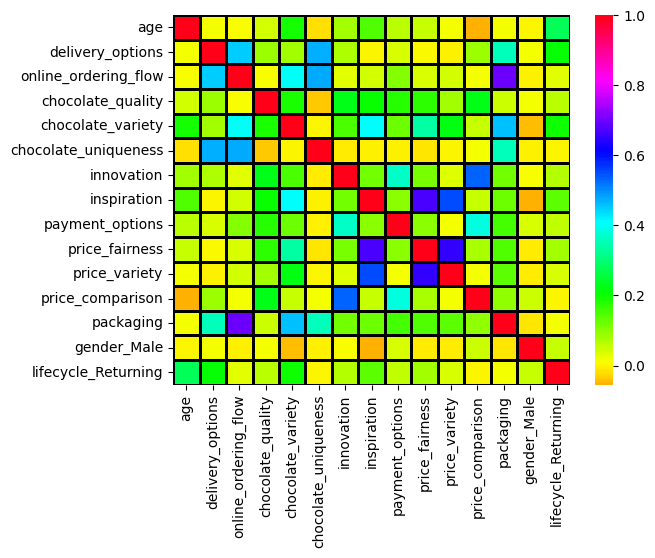

In [7]:
X = df.drop(["satisfaction_Satisfied", "id"], axis = 1)
y = df.satisfaction_Satisfied
matrixC = X.corr()
sns.heatmap(matrixC, cmap='hsv' , center= 0.4, annot=False, fmt=".3g",linewidths=1,linecolor='black') 
            
#cmap='hsv', center="twilight_shifted", robust=False, annot=True, fmt='.2g', annot_kws=None, linewidths=1, linecolor='black', cbar=True, cbar_kws=None, cbar_ax=None, 
                #square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None)


In [8]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 1502, stratify = y)

In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=1502) 
model.fit(X_train,y_train)

RandomForestClassifier(random_state=1502)

In [10]:
predictions = model.predict(X_test)
predictions[:5]

array([0, 1, 0, 0, 0], dtype=uint8)

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))

0.918


In [12]:
model.get_params()
# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [13]:
from sklearn.model_selection import GridSearchCV

base_model = RandomForestClassifier(random_state=1502)
grid_search = GridSearchCV(estimator = base_model, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)

In [14]:
grid_search.fit(X, y)
#grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1502),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             verbose=1)

In [15]:
print("Best parameters: ", grid_search.best_params_)


Best parameters:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [16]:
print("Best score: ", grid_search.best_score_)

Best score:  0.9195996334946696


In [17]:
best_params = grid_search.best_params_
best_params

tuned_model = RandomForestClassifier(max_depth = best_params['max_depth'],
                                     max_features = best_params['max_features'],
                                     min_samples_leaf = best_params['min_samples_leaf'],
                                     min_samples_split = best_params['min_samples_split'],
                                     n_estimators = best_params['n_estimators'],
                                     random_state = 1502)
tuned_model.fit(X, y)

#Feature Importance
importance = pd.Series(tuned_model.feature_importances_,
                       index = X.columns.values,
                       name = "importance")
#Removing non-drivers
importance  = importance.drop(["age", "gender_Male", "lifecycle_Returning"])

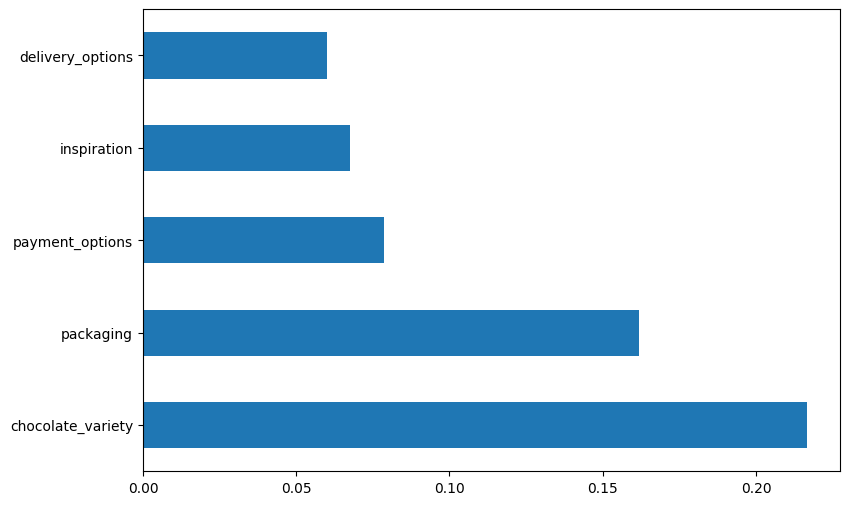

In [19]:
# Plotting feature Importance
importance.nlargest(5).plot(kind = 'barh',
                            figsize = (9,6))
plt.show()

In [30]:
scoring = X.drop(columns = ["age", "gender_Male", "lifecycle_Returning"]).mean().rename("scoring")
df_drivers = pd.concat([importance, scoring], axis = 1)

In [31]:
df_drivers

,importance,scoring
delivery_options,0.060158,3.0534
online_ordering_flow,0.050975,2.7636
chocolate_quality,0.032581,3.3136
chocolate_variety,0.216719,3.2458
chocolate_uniqueness,0.040009,2.9798
innovation,0.053762,3.3866
inspiration,0.067629,3.4434
payment_options,0.078622,3.3576
price_fairness,0.041268,3.3106
price_variety,0.030470,3.2118


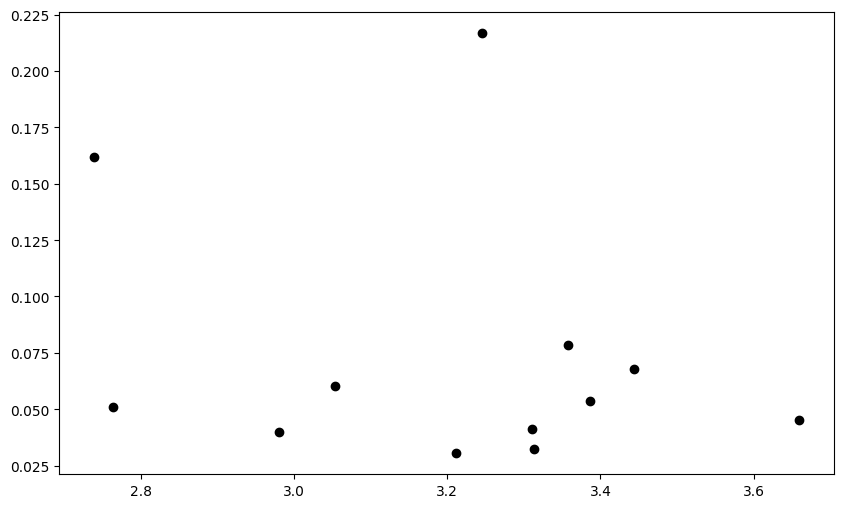

In [32]:
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 

#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")

plt.show()

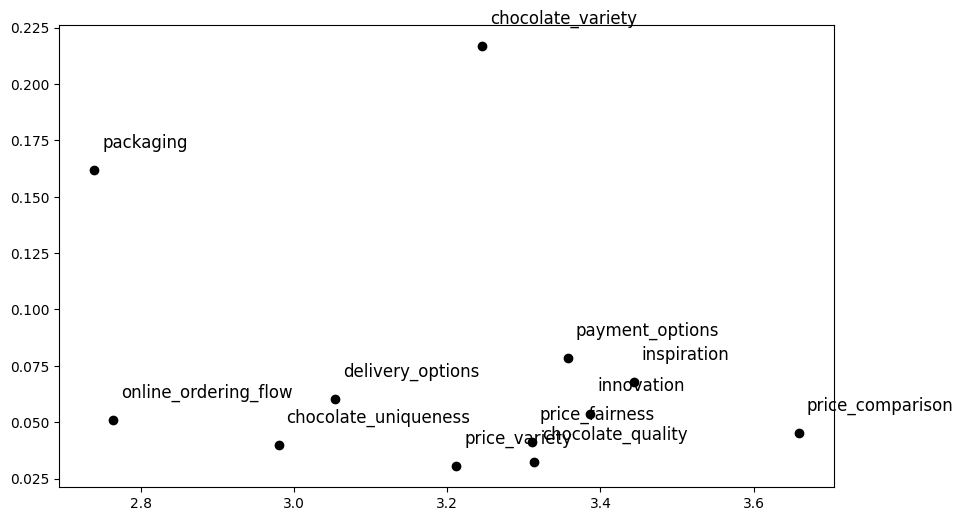

In [33]:
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 

#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")

#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")

plt.show()


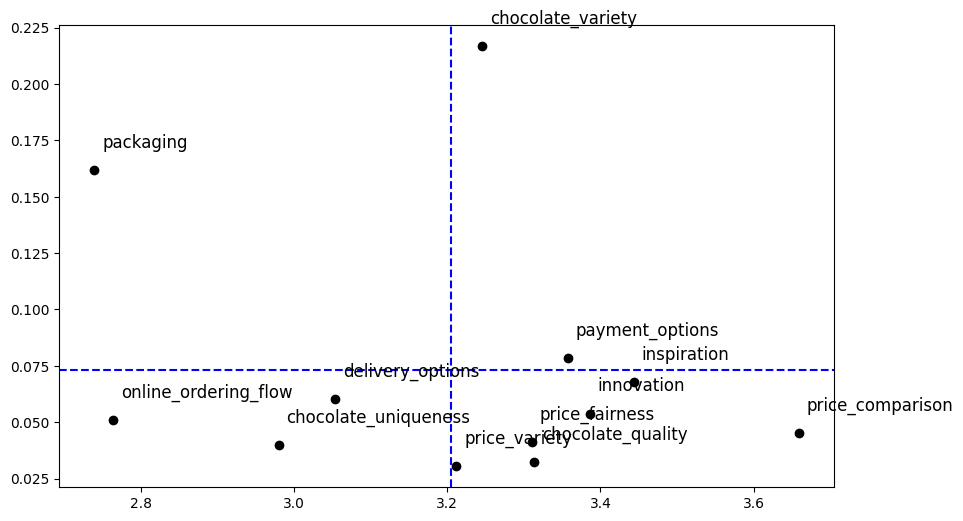

In [34]:
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 

#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")

#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")

#Add vertical and horizontal line
plt.axvline(df_drivers.scoring.mean(), 
            color = "b", 
            linestyle = "dashed")
plt.axhline(df_drivers.importance.mean(), 
            color = "b", 
            linestyle = "dashed")

plt.show()

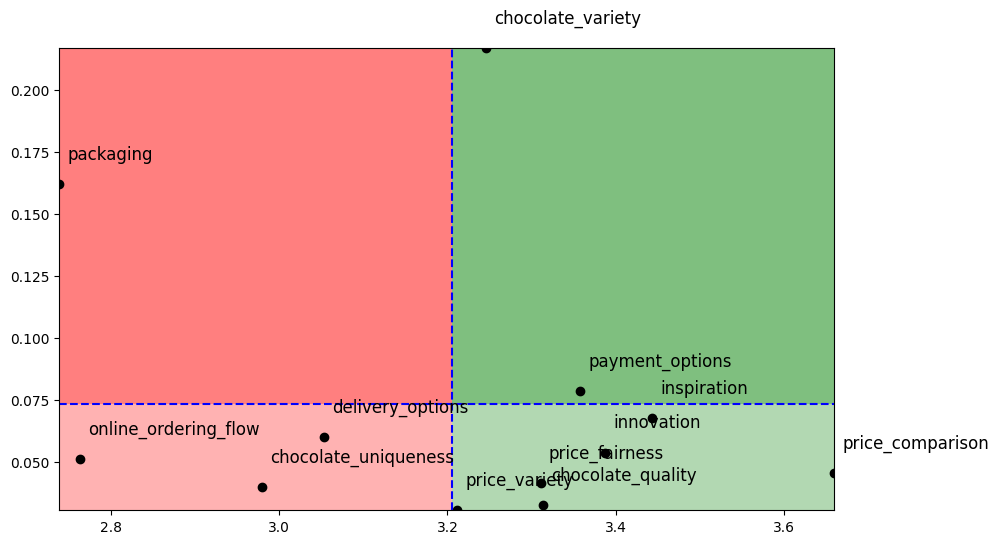

In [35]:
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 

# colouring
ax.margins(0)
ax.axvspan(df_drivers.scoring.mean(), 
           df_drivers.scoring.max(), 
           facecolor='green', 
           alpha=0.5)
ax.axvspan(df_drivers.scoring.min(), 
           df_drivers.scoring.mean(), 
           facecolor='red', 
           alpha=0.5)
ax.axhspan(df_drivers.importance.min(), 
           df_drivers.importance.mean(), 
           facecolor='white', 
           alpha=0.4)


#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")

#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")

#Add vertical and horizontal line
plt.axvline(df_drivers.scoring.mean(), 
            color = "b", 
            linestyle = "dashed")
plt.axhline(df_drivers.importance.mean(), 
            color = "b", 
            linestyle = "dashed")

plt.show()

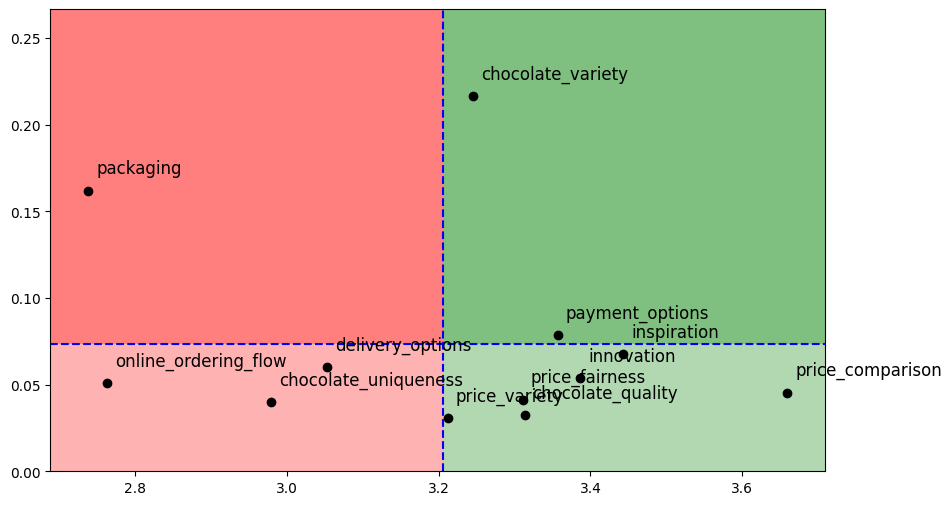

In [36]:
#set size of the graph
fig, ax = plt.subplots(figsize=(10,6)) 

# colouring
ax.margins(0)
ax.axvspan(df_drivers.scoring.mean(), 
           df_drivers.scoring.max()+0.05, 
           facecolor='green', 
           alpha=0.5)
ax.axvspan(df_drivers.scoring.min()-0.05, 
           df_drivers.scoring.mean(), 
           facecolor='red', 
           alpha=0.5)
ax.axhspan(0, 
           df_drivers.importance.mean(), 
           facecolor='white', 
           alpha=0.4)
ax.axhspan(0, 
           df_drivers.importance.max() + 0.05, 
           facecolor='white', 
           alpha=0)

#Scatterplot
plt.scatter(df_drivers["scoring"], 
            df_drivers["importance"], 
            color = "black")

#Adding text
for idx, row in df_drivers.iterrows(): 
    plt.text(row['scoring'] + 0.01, row['importance'] + 0.01, 
             idx,
             size = "large")

#Add vertical and horizontal line
plt.axvline(df_drivers.scoring.mean(), 
            color = "b", 
            linestyle = "dashed")
plt.axhline(df_drivers.importance.mean(), 
            color = "b", 
            linestyle = "dashed")

plt.show()